In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install pmdarima

In [56]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import plotly.express as px  # For a concise syntax
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, MinMaxScaler
print("Done")


Done


In [68]:

import yfinance as yf

start_date = '2023-03-02'
end_date = '2024-03-02'
ticker = 'MSFT'

df_2 = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [25]:
df_2.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [69]:
df_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-02,246.550003,251.399994,245.610001,251.110001,249.065842,24808200
2023-03-03,252.190002,255.619995,251.389999,255.289993,253.211807,30760100
2023-03-06,256.429993,260.119995,255.979996,256.869995,254.778931,24109800
2023-03-07,256.299988,257.690002,253.389999,254.149994,252.081085,21473200
2023-03-08,254.039993,254.539993,250.809998,253.699997,251.634750,17340200


In [70]:
df_2["Index_Values"] = df_2.index
df_2.head()

,Open,High,Low,Close,Adj Close,Volume,Index_Values
Date,,,,,,,
2023-03-02,246.550003,251.399994,245.610001,251.110001,249.065842,24808200,2023-03-02
2023-03-03,252.190002,255.619995,251.389999,255.289993,253.211807,30760100,2023-03-03
2023-03-06,256.429993,260.119995,255.979996,256.869995,254.778931,24109800,2023-03-06
2023-03-07,256.299988,257.690002,253.389999,254.149994,252.081085,21473200,2023-03-07
2023-03-08,254.039993,254.539993,250.809998,253.699997,251.634750,17340200,2023-03-08


In [71]:
df_2["Index_Values"] = df_2["Index_Values"].dt.strftime("%H")

In [94]:
df_2["Date"] = df_2["Date"].dt.strftime("%H")

In [72]:
df_2.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Index_Values     object
dtype: object

In [47]:
# Select the columns with potential missing values (adjust as needed)
columns_with_missing_values = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in columns_with_missing_values:
    df_2[col] = df_2[col].fillna(df_2[col].mean())
    
print(df_2.head())     

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-02  246.550003  251.399994  245.610001  251.110001  249.065842   
2023-03-03  252.190002  255.619995  251.389999  255.289993  253.211807   
2023-03-06  256.429993  260.119995  255.979996  256.869995  254.778931   
2023-03-07  256.299988  257.690002  253.389999  254.149994  252.081085   
2023-03-08  254.039993  254.539993  250.809998  253.699997  251.634750   

              Volume Index_Values  
Date                               
2023-03-02  24808200   2023-03-02  
2023-03-03  30760100   2023-03-03  
2023-03-06  24109800   2023-03-06  
2023-03-07  21473200   2023-03-07  
2023-03-08  17340200   2023-03-08  


In [73]:
df_2.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Index_Values    0
dtype: int64

In [74]:
df_2.shape

(252, 7)

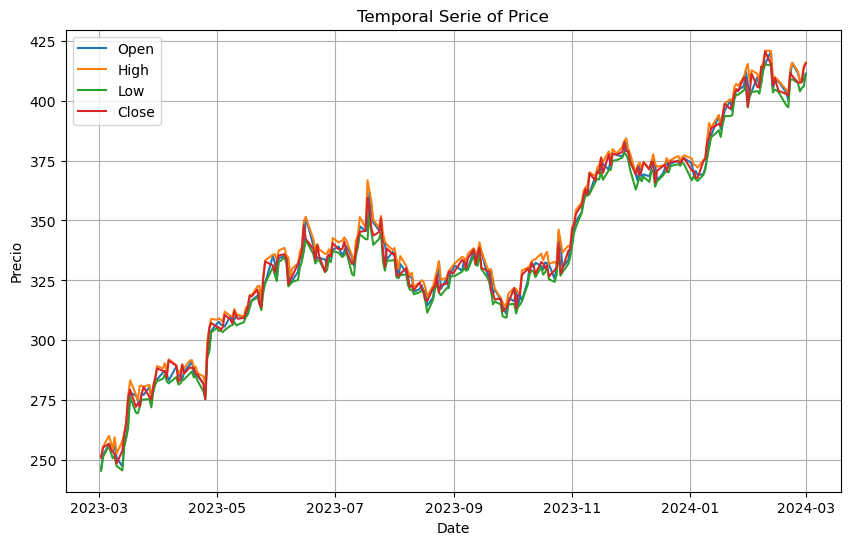

In [79]:
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(data["Open"], label="Open")
plt.plot(data["High"], label="High")
plt.plot(data["Low"], label="Low")
plt.plot(data["Close"], label="Close")
plt.xlabel("Date")
plt.ylabel("Precio")
plt.title("Temporal Serie of Price")
plt.legend()
plt.grid(True)
plt.show()

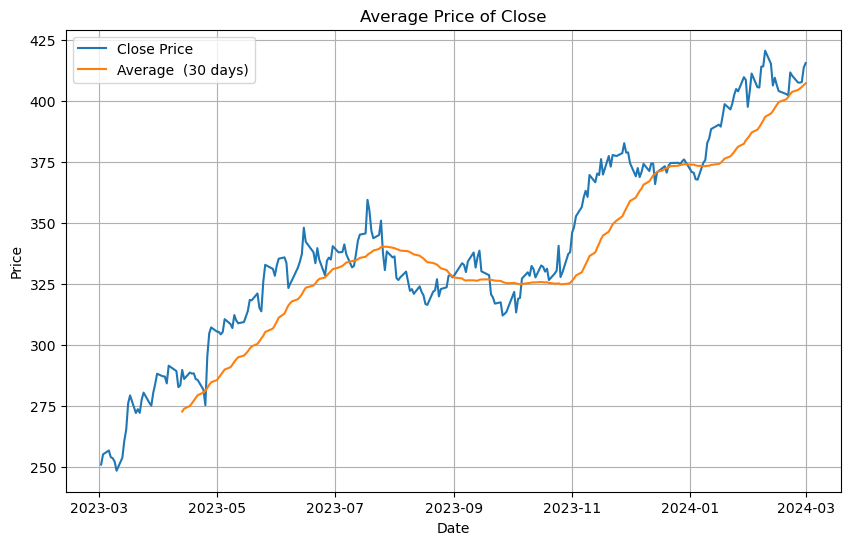

In [83]:
# Cierra la figura si ya está abierta
plt.close()

promedio_movil_close = data["Close"].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(data["Close"], label="Close Price")
plt.plot(promedio_movil_close, label="Average  (30 days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Average Price of Close")
plt.legend()
plt.grid(True)
plt.show()

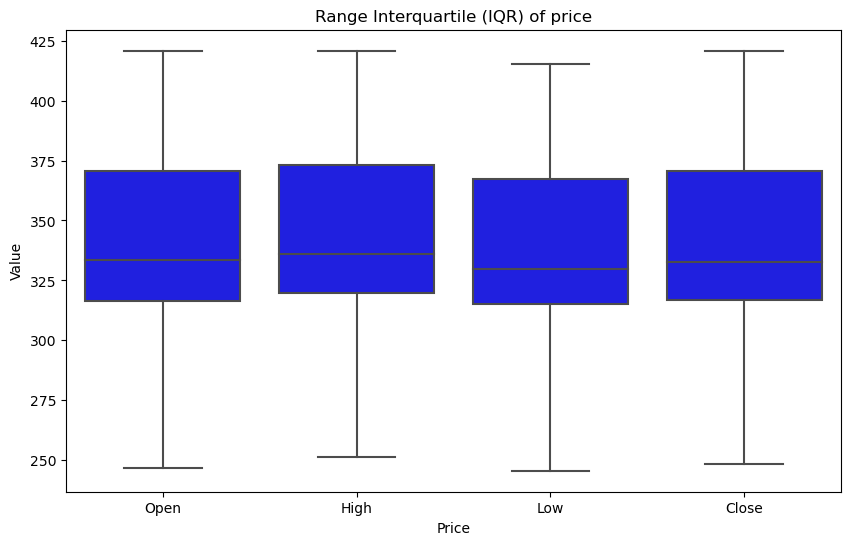

In [85]:

plt.close()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Open", "High", "Low", "Close"]], color="b")
plt.xlabel("Price")
plt.ylabel("Value")
plt.title("Range Interquartile (IQR) of price")
plt.show()

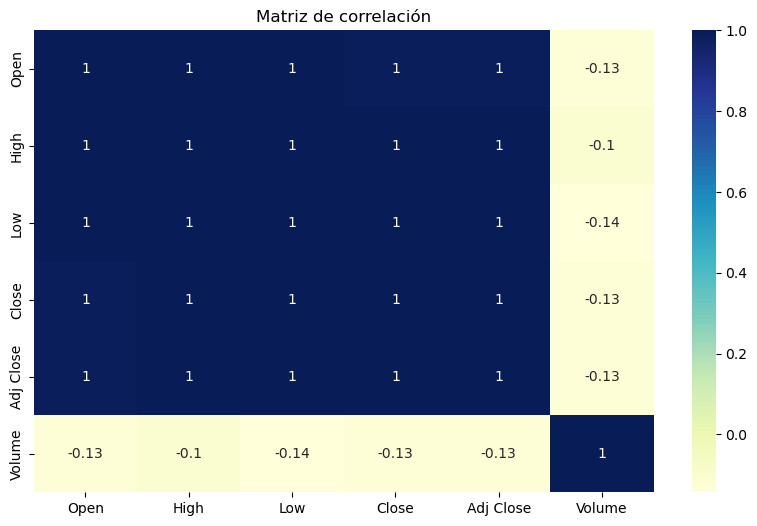

In [86]:
plt.close()

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Matriz de correlación")
plt.show()

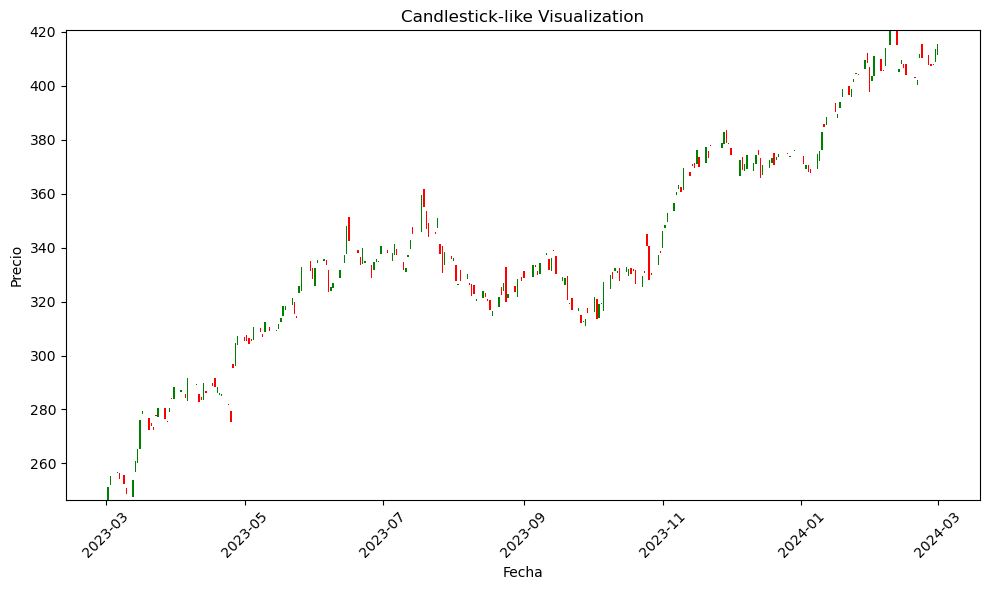

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'data'

# Calculate the minimum, maximum, opening, and closing prices for each bar
data["Low"] = data["Close"].where(data["Close"] < data["Open"], data["Open"])
data["High"] = data["Close"].where(data["Close"] > data["Open"], data["Open"])

# Create the candlestick-like bars
plt.figure(figsize=(10, 6))
plt.bar(data.index, data["High"] - data["Low"], bottom=data["Low"], width=0.6, color="black")
plt.bar(data.index, data["Close"] - data["Open"], bottom=data["Open"], width=0.6, color=data["Close"].gt(data["Open"]).map({True: "green", False: "red"}))

# Customize the plot
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("Candlestick-like Visualization")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [90]:
df_2.to_csv("MSFT.csv", index=False)

In [96]:
df_2["Date"] = df_2.index
df_2.head()

,Open,High,Low,Close,Adj Close,Volume,Index_Values,Date
Date,,,,,,,,
2023-03-02,246.550003,251.399994,245.610001,251.110001,249.065842,24808200,00,2023-03-02
2023-03-03,252.190002,255.619995,251.389999,255.289993,253.211807,30760100,00,2023-03-03
2023-03-06,256.429993,260.119995,255.979996,256.869995,254.778931,24109800,00,2023-03-06
2023-03-07,256.299988,257.690002,253.389999,254.149994,252.081085,21473200,00,2023-03-07
2023-03-08,254.039993,254.539993,250.809998,253.699997,251.634750,17340200,00,2023-03-08


In [134]:
df_2.to_csv("MSFT.csv", index=False)

In [99]:
from prophet import Prophet

In [100]:
df_2["Date"] = df_2["Date"].dt.strftime("%Y-%m-%d")

In [108]:
print(df_2["Date"].dtype)

object


In [109]:
df_2["Date"] = pd.to_datetime(df_2["Date"])

In [110]:
df_2["Date"] = pd.to_datetime(df_2["Date"], format="%d/%m/%Y")

In [111]:
df_2["ds"] = df_2["Date"].dt.strftime("%Y-%m-%d")

In [112]:
print(df_2["Date"].dtype)

datetime64[ns]


In [113]:

df_2["y"] = df_2["Close"]

In [114]:
model = Prophet()

In [115]:
model.fit(df_2)

17:15:53 - cmdstanpy - INFO - Chain [1] start processing
17:15:53 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

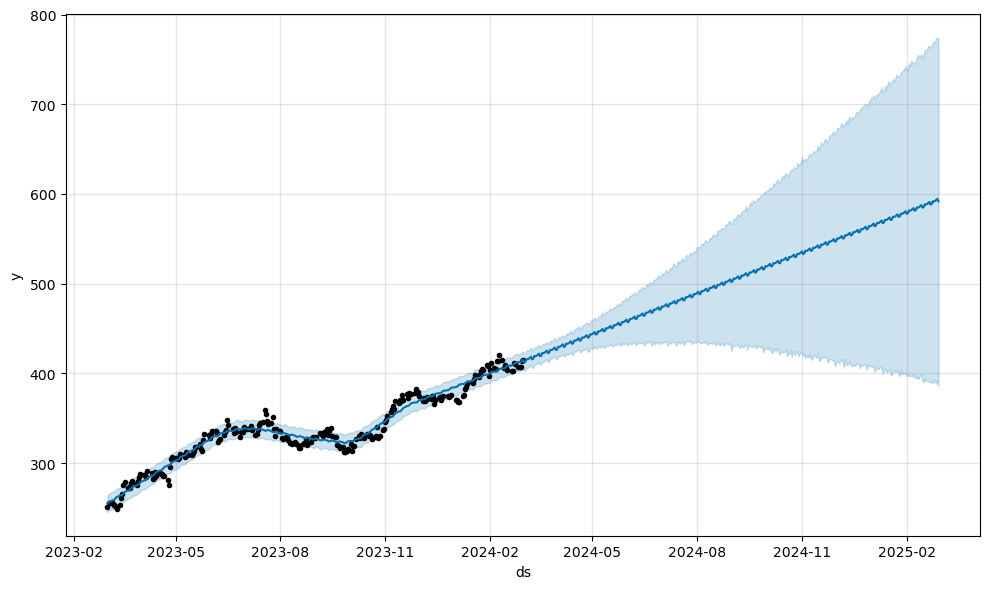

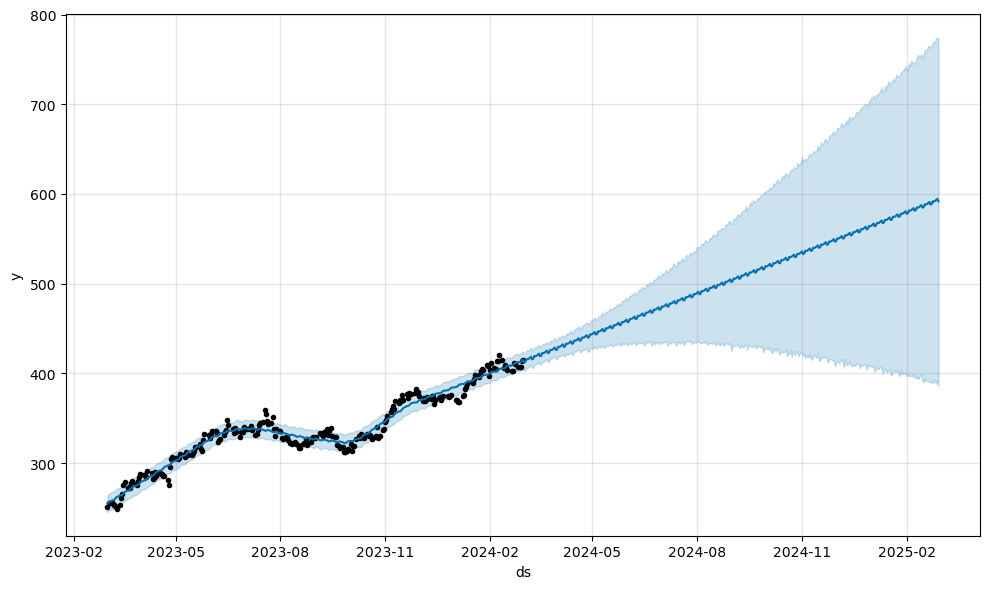

In [117]:
model.plot(forecast)

In [121]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-02,254.205646,245.552172,264.269608,254.205646,254.205646,0.860918,0.860918,0.860918,0.860918,0.860918,0.860918,0.0,0.0,0.0,255.066564
1,2023-03-03,255.006466,247.274776,265.915418,255.006466,255.006466,1.537224,1.537224,1.537224,1.537224,1.537224,1.537224,0.0,0.0,0.0,256.543690
2,2023-03-06,257.408928,248.494346,268.119477,257.408928,257.408928,0.893348,0.893348,0.893348,0.893348,0.893348,0.893348,0.0,0.0,0.0,258.302276
3,2023-03-07,258.209748,248.243080,268.665104,258.209748,258.209748,0.153558,0.153558,0.153558,0.153558,0.153558,0.153558,0.0,0.0,0.0,258.363306
4,2023-03-08,259.010569,249.412285,267.969235,259.010569,259.010569,0.187345,0.187345,0.187345,0.187345,0.187345,0.187345,0.0,0.0,0.0,259.197914


In [135]:
forecast.to_csv("MSFT_forecast.csv", index=False)

In [138]:
df_2.head()

,Open,High,Low,Close,Adj Close,Volume,Index_Values,Date,ds,y
Date,,,,,,,,,,
2023-03-02,246.550003,251.399994,245.610001,251.110001,249.065842,24808200,00,2023-03-02,2023-03-02,251.110001
2023-03-03,252.190002,255.619995,251.389999,255.289993,253.211807,30760100,00,2023-03-03,2023-03-03,255.289993
2023-03-06,256.429993,260.119995,255.979996,256.869995,254.778931,24109800,00,2023-03-06,2023-03-06,256.869995
2023-03-07,256.299988,257.690002,253.389999,254.149994,252.081085,21473200,00,2023-03-07,2023-03-07,254.149994
2023-03-08,254.039993,254.539993,250.809998,253.699997,251.634750,17340200,00,2023-03-08,2023-03-08,253.699997
